# Q2.2 Train a Tokenizer

In [1]:
#TODO task1: Tokenizer Training using BPE
from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.pre_tokenizers import Whitespace    
from tokenizers.trainers import BpeTrainer

tokenizer = Tokenizer(BPE())
tokenizer.pre_tokenizer = Whitespace()
trainer = BpeTrainer(vocab_size=6000, special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"])
tokenizer.train(files=["data.txt"], trainer=trainer)

# Q2.3 Train a Word Embedding Model

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


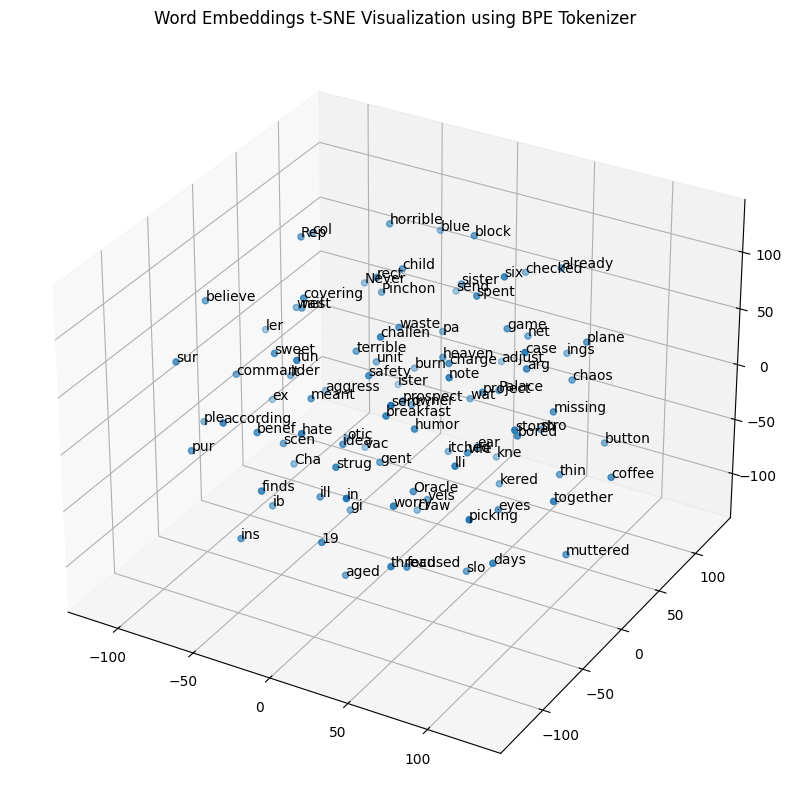

In [2]:
#TODO task2: Train a word embedding model using CBOW
import random
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
import numpy as np

random.seed(114)
np.random.seed(514)

with open('data.txt','r',encoding='utf-8') as file:
    data = file.readlines()
    
#sentences = [line.strip().split() for line in data]
sentences = [tokenizer.encode(line.strip()).tokens for line in data]

word2vec_model = Word2Vec(sentences, vector_size = 100, window=5, min_count=10, sg=0, workers=1, seed=0)

words = list(word2vec_model.wv.index_to_key)
random_words = random.sample(words,100)

word_vectors = np.array([word2vec_model.wv[word] for word in random_words])

# TODO visualization
tsne = TSNE(n_components=3, random_state=114)
word_vectors_tsne = tsne.fit_transform(word_vectors)

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(word_vectors_tsne[:, 0], word_vectors_tsne[:, 1], word_vectors_tsne[:, 2])

for i, word in enumerate(random_words):
    ax.text(word_vectors_tsne[i, 0], word_vectors_tsne[i, 1], word_vectors_tsne[i, 2], word)

plt.title("Word Embeddings t-SNE Visualization using BPE Tokenizer")
plt.show()


# Q2.4.1 BytePiece

In [48]:
# TODO task3: train a word embedding model using BytePiece
from bytepiece import Trainer, Tokenizer

class corpus:
    def __iter__(self):
        f = 'data.txt'  
        with open(f, 'r', encoding='utf-8') as f:
            content = f.read()  
            for item in content.split('\n\n'):
                a=item.strip()
                if(a!=''):
                    yield a  

trainer = Trainer(order=6, max_vocab_size=6000, min_count=10)
trainer.train(corpus(), workers=1, batch_size=1000)
trainer.save('bytepiece.model')

Count Ngrams: 51288it [00:14, 3608.14it/s]
Prune Ngrams: 100% 7/7 [00:00<00:00, 24.25it/s]
Count Pieces: 51288it [00:52, 978.71it/s] 
Prune Pieces: 100% 374029/374029 [00:03<00:00, 105729.85it/s]
Prune Pieces: 100% 6598/6598 [00:00<00:00, 197740.76it/s]
Prune Pieces: 100% 6548/6548 [00:00<00:00, 199360.51it/s]
Prune Pieces: 100% 6547/6547 [00:00<00:00, 191545.18it/s]
Prune Pieces: 100% 550/550 [00:00<00:00, 33675.91it/s]
Prune Pieces: 100% 5997/5997 [00:00<00:00, 194061.19it/s]
Prune Pieces: 100% 5995/5995 [00:00<00:00, 196717.72it/s]


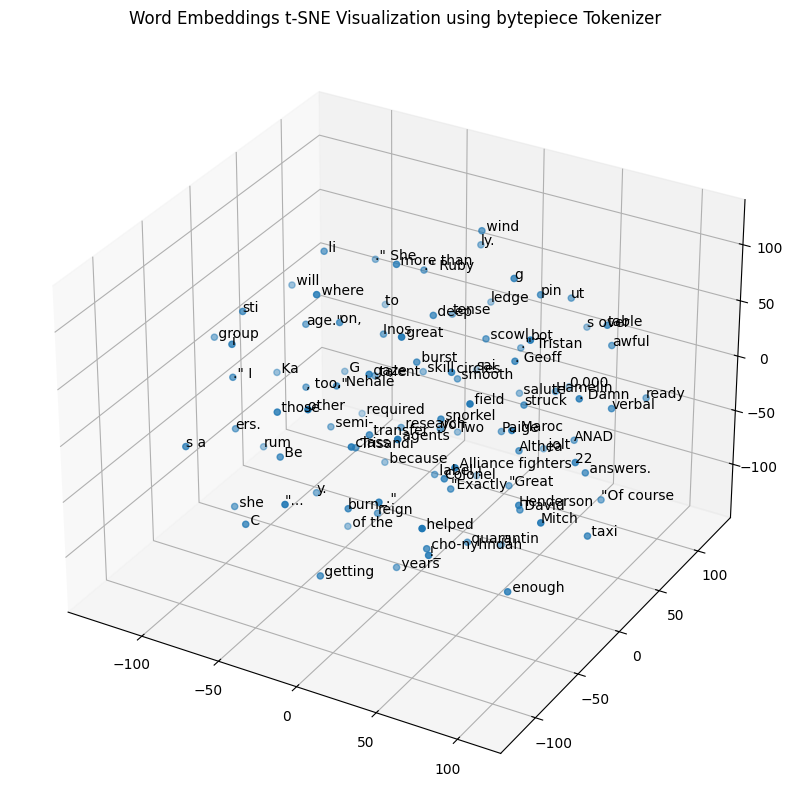

In [52]:
bytepiece_tokenizer = Tokenizer('bytepiece.model')

def load_corpus(path):
    with open(path,'r',encoding='utf-8') as f:
        content = f.read()
    return [item.strip() for item in content.split('\n\n') if item.strip()]

def tokenize_corpus(corpus):
    return [[token.decode('utf-8', errors='ignore') for token in bytepiece_tokenizer.tokenize(text)] for text in corpus]

corpus = load_corpus('data.txt')
tokenized_corpus = tokenize_corpus(corpus)

bytepiece_model = Word2Vec(tokenized_corpus, vector_size = 100, window=5, min_count=10, sg=0, workers=1, seed=0)

words_bytepiece = list(bytepiece_model.wv.index_to_key)
random_words_bytepiece = random.sample(words_bytepiece,100)

word_vectors_bytepiece = np.array([bytepiece_model.wv[word] for word in random_words_bytepiece])

# TODO visualization
tsne = TSNE(n_components=3, random_state=114)
word_vectors_tsne_bytepiece = tsne.fit_transform(word_vectors_bytepiece)

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(word_vectors_tsne_bytepiece[:, 0], word_vectors_tsne_bytepiece[:, 1], word_vectors_tsne_bytepiece[:, 2])

for i, word in enumerate(random_words_bytepiece):
    ax.text(word_vectors_tsne_bytepiece[i, 0], word_vectors_tsne_bytepiece[i, 1], word_vectors_tsne_bytepiece[i, 2], word)

plt.title("Word Embeddings t-SNE Visualization using bytepiece Tokenizer")
plt.show()